In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier


In [4]:
file_path = "../data/cleaned_diabetes_health_indicators_dataset.csv"
df = pd.read_csv(file_path)


In [5]:
# 2. Split dataset into features (X) and target (y)
X = df.drop('Diabetes_012', axis=1)  # Drop the target column from features
y = df['Diabetes_012']               # Set target column


In [6]:
# 3. Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [7]:
# 4. Scale features (very important for kNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# 5. Train kNN model
knn = KNeighborsClassifier(n_neighbors=5)  # 5 neighbors for now
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [9]:
# 6. Make predictions
y_pred = knn.predict(X_test_scaled)


In [10]:
# 7. Evaluate model performance
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy Score: 0.8152620928259025

Classification Report:

              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90     38012
         1.0       0.05      0.00      0.00       926
         2.0       0.41      0.21      0.27      7019

    accuracy                           0.82     45957
   macro avg       0.44      0.39      0.39     45957
weighted avg       0.77      0.82      0.78     45957



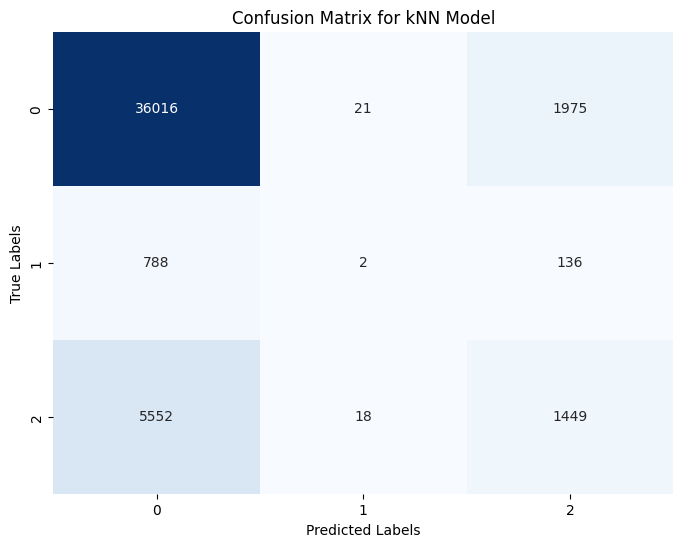

In [11]:
# 8. Plot confusion matrix for better visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for kNN Model')
plt.show()
